In [7]:
# Import Libraries and Load Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sample dataset from seaborn
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# Inspect Data
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

C:\Users\HAO YAN\AppData\Local\Temp\ipykernel_26052\3405637394.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


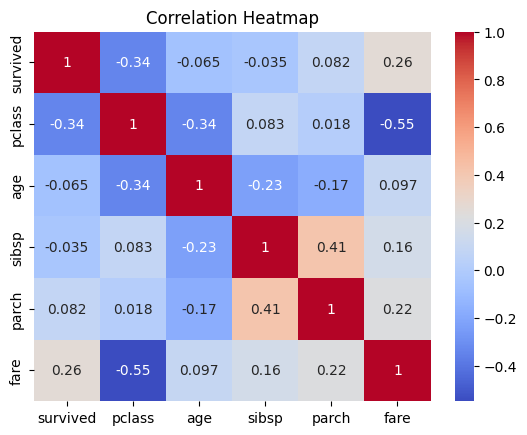

In [9]:
# Clean Data
# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)
# Drop 'deck' due to too many missing values
df.drop(columns=['deck'], inplace=True)
# Rename a column
df.rename(columns={'sex': 'gender'}, inplace=True)

# Only select numeric columns to avoid ValueError
numeric_df = df.select_dtypes(include='number')

# Generate correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Select and Filter Data
# Select rows where age > 60
df[df['age'] > 60]
# Select specific columns
df[['gender', 'age', 'fare']]

,gender,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500
...,...,...,...
886,male,27.0,13.0000
887,female,19.0,30.0000
888,female,28.0,23.4500
889,male,26.0,30.0000


In [11]:
# Group By and Aggregation
df.groupby('class')['fare'].mean()
df.groupby(['class', 'gender'])['survived'].mean()

C:\Users\HAO YAN\AppData\Local\Temp\ipykernel_26052\4197537151.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['fare'].mean()
C:\Users\HAO YAN\AppData\Local\Temp\ipykernel_26052\4197537151.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['class', 'gender'])['survived'].mean()


class   gender
First   female    0.968085
        male      0.368852
Second  female    0.921053
        male      0.157407
Third   female    0.500000
        male      0.135447
Name: survived, dtype: float64

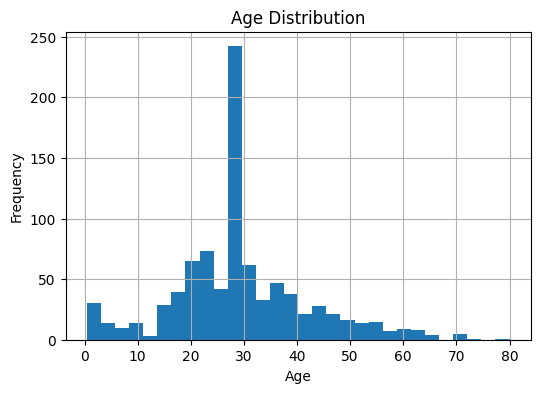

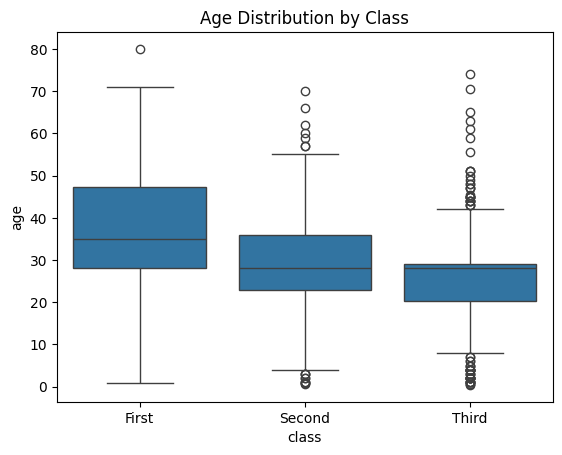

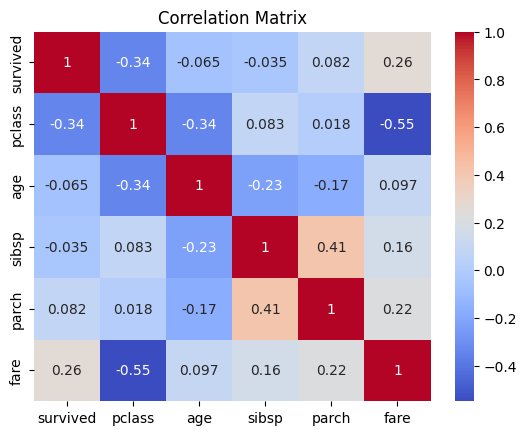

In [12]:
# Data Visualization
# Histogram
plt.figure(figsize=(6,4))
df['age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot by class
sns.boxplot(x='class', y='age', data=df)
plt.title('Age Distribution by Class')
plt.show()

# Heatmap with only numeric columns
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Summary
# - Demonstrated how to load and explore real-world dataset
# - Performed cleaning: nulls, renaming, column removal
# - Selected/filter data using Pandas indexing
# - Aggregated using groupby, and visualized key distributions